In [43]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import skimage.filters as ski
from PIL import Image

img = Image.open(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\Masker\6ps_250x_chinese\org_0nbr_13_upscaled_chinese.tif")
org = Image.open(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\6ps_250xto1000x_upscaled\org_0nbr_13_upscaled.tif")

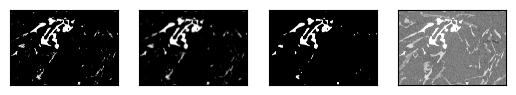

In [44]:
filtered = ski.gaussian(np.asarray(img), sigma=10.0)

clean_mask =  (filtered > 0.5).astype(int)

fig, ax = plt.subplots(1, 4)

ax[0].imshow(img, cmap="Greys_r")
ax[1].imshow(filtered, cmap="Greys_r")
ax[2].imshow(clean_mask, cmap="Greys_r")
ax[3].imshow(np.asarray(org), cmap="Greys_r")

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([]) 
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[3].set_xticks([])
ax[3].set_yticks([])

fig.savefig("org_and_filt", dpi = 300)

In [30]:
clean_mask = clean_mask.astype(int)
print(np.unique(clean_mask))

[0 1]


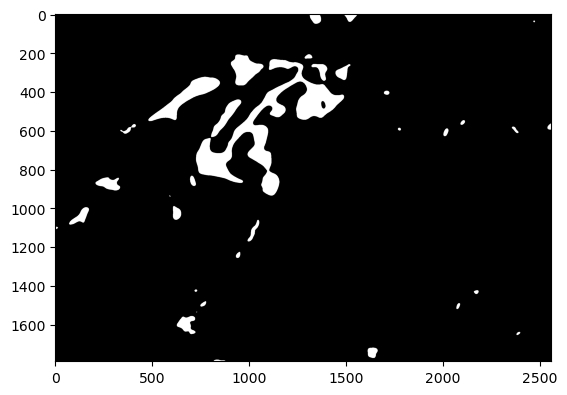

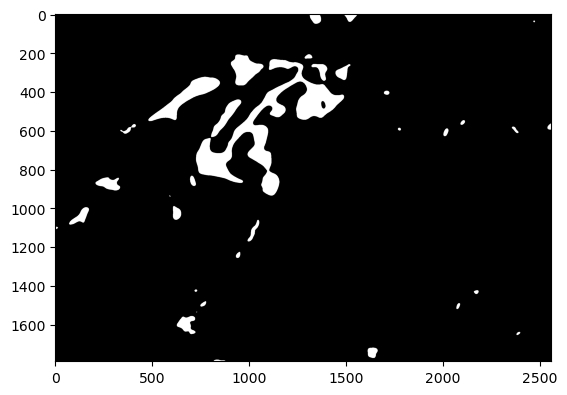

In [49]:
def clean_binary_mask(path):
    img = Image.open(path)
    arr = np.asarray(img)
    filtered = ski.gaussian(np.asarray(arr), sigma=10.0)
    return (filtered > 0.5).astype(int)


fig, ax = plt.subplots(1, 1)

ax.imshow(clean_binary_mask(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\Masker\6ps_250x_chinese\org_0nbr_13_upscaled_chinese.tif"), cmap="Greys_r")

fig

In [55]:
import imageio
def filter_all_chinese(chinese_folder_str, save_folder_str):
    chinese_folder = Path(chinese_folder_str)
    save_folder = Path(save_folder_str)
    for file in chinese_folder.iterdir():
        if Path(save_folder / f"{file.stem}_gaussian{file.suffix}").exists():
            pass
        else:
            filtered = clean_binary_mask(file.resolve())
            mask = (filtered * 255).astype(np.uint8)
            imageio.imwrite(save_folder / f"{file.stem}_gaussian{file.suffix}", mask)

filter_all_chinese(r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\Masker\6ps_250x_chinese", r"C:\Users\magfa\Documents\Prosjekt\Prosjektbilder\Masker\6ps_250x_chinese_gaussian")